In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,Adamax
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
#path of the data for the model
#train_dir = "../input/ckplus/CK+48" #passing the path with training images
#test_dir = "../input/ckplus/CK+48"   #passing the path with testing images
train_dir = "../input/fer2013/train" #passing the path with training images
test_dir = "../input/fer2013/test"   #passing the path with testing imag

In [3]:
#Data Augmentation and splitting the train and validation data
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2
                                       )


In [4]:
#Loading the train and validation data for the model
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (48,48),
                                                              batch_size = 32,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [5]:
#Defining the CNN Model
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [6]:
#Training the model
cnn_model = model.fit(x = train_generator,epochs = 100,batch_size = 32,validation_data = validation_generator)

Epoch 1/100
718/718 [==============================] - 179s 241ms/step - loss: 9.4140 - accuracy: 0.1829 - val_loss: 8.1532 - val_accuracy: 0.2620
Epoch 2/100
718/718 [==============================] - 72s 101ms/step - loss: 7.9414 - accuracy: 0.2293 - val_loss: 6.6620 - val_accuracy: 0.2937
Epoch 3/100
718/718 [==============================] - 72s 100ms/step - loss: 6.4779 - accuracy: 0.2572 - val_loss: 5.2272 - val_accuracy: 0.3257
Epoch 4/100
718/718 [==============================] - 72s 100ms/step - loss: 5.1377 - accuracy: 0.2851 - val_loss: 4.3793 - val_accuracy: 0.3013
Epoch 5/100
718/718 [==============================] - 72s 100ms/step - loss: 4.0853 - accuracy: 0.3290 - val_loss: 3.3794 - val_accuracy: 0.3898
Epoch 6/100
718/718 [==============================] - 72s 100ms/step - loss: 3.3170 - accuracy: 0.3644 - val_loss: 2.7630 - val_accuracy: 0.4255
Epoch 7/100
718/718 [==============================] - 73s 101ms/step - loss: 2.7601 - accuracy: 0.3997 - val_loss: 2.3350 

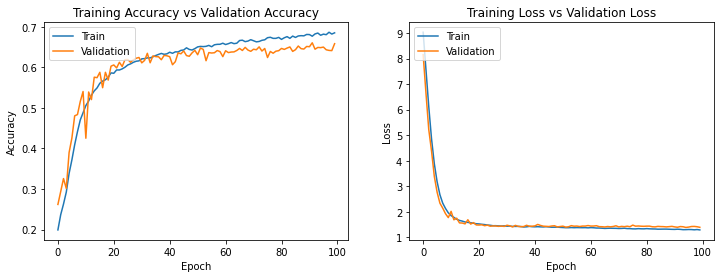

In [7]:
#Displaying the Accuracy and Loss Graphs
fig , ax = plt.subplots(1,2)
train_acc = cnn_model.history['accuracy']
train_loss = cnn_model.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(cnn_model.history['accuracy'])
ax[0].plot(cnn_model.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(cnn_model.history['loss'])
ax[1].plot(cnn_model.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [8]:
#Data Augmentation of Test data and loading the test data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (48,48),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical"
                                                             )



Found 7178 images belonging to 7 classes.


In [10]:
#Evaluating the model based on Test data
model.evaluate(test_generator)

113/113 [==============================] - 33s 285ms/step - loss: 1.8034 - accuracy: 0.6573


[1.8034496307373047, 0.6572861671447754]

In [11]:
model.save("CNN_face_classifier.h5") #Saving the model

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Text(0.5, 1.0, 'Confusion Matrix')

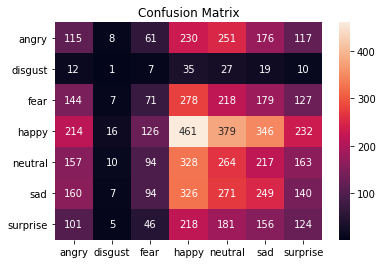

In [13]:
#Confusion matrix for the model
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
conf = confusion_matrix(test_generator.classes, y_pred)

x_axis_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] # labels for x-axis
y_axis_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] # labels for y-axis
ax = plt.axes()
sns.heatmap(conf, annot=True, fmt ="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('Confusion Matrix')

